In [1]:
# importing the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Supressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading and Loading the Train and Test dataset
df_train = pd.read_csv(r"C:\Users\pursw\Downloads\Job-e-thon\train_orig.csv")
df_test = pd.read_csv(r"C:\Users\pursw\Downloads\Job-e-thon\test_orig.csv")

In [3]:
# Diplaying the Train dataset
df_train.head(10)

,row_id,user_id,category_id,video_id,age,gender,profession,followers,views,engagement_score
0,1,19990,37,128,24,Male,Student,180,1000,4.33
1,2,5304,32,132,14,Female,Student,330,714,1.79
2,3,1840,12,24,19,Male,Student,180,138,4.35
3,4,12597,23,112,19,Male,Student,220,613,3.77
4,5,13626,23,112,27,Male,Working Professional,220,613,3.13
5,6,9323,25,139,35,Male,Other,240,317,3.33
6,7,2071,7,14,23,Male,Student,160,467,3.80
7,8,21848,8,100,18,Male,Student,280,628,3.87
8,9,12896,3,4,15,Male,Student,270,621,2.88
9,10,16058,5,161,19,Male,Student,240,229,3.80


In [4]:
# Diplaying the Test dataset
df_test.head(10)

,row_id,user_id,category_id,video_id,age,gender,profession,followers,views
0,89198,7986,12,42,14,Male,Student,180,138
1,89199,11278,34,115,14,Male,Student,230,840
2,89200,17245,8,110,44,Female,Working Professional,280,628
3,89201,9851,16,137,18,Male,Student,270,462
4,89202,16008,34,96,47,Female,Other,230,840
5,89203,5291,42,134,23,Male,Student,290,689
6,89204,22128,5,109,33,Male,Other,240,229
7,89205,23490,16,137,26,Female,Student,270,462
8,89206,4833,21,123,28,Female,Other,320,909
9,89207,12450,19,44,13,Male,Student,230,369


In [5]:
# basics of dataframe
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89197 entries, 0 to 89196
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   row_id            89197 non-null  int64  
 1   user_id           89197 non-null  int64  
 2   category_id       89197 non-null  int64  
 3   video_id          89197 non-null  int64  
 4   age               89197 non-null  int64  
 5   gender            89197 non-null  object 
 6   profession        89197 non-null  object 
 7   followers         89197 non-null  int64  
 8   views             89197 non-null  int64  
 9   engagement_score  89197 non-null  float64
dtypes: float64(1), int64(7), object(2)
memory usage: 6.8+ MB


In [6]:
# basics of dataframe
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11121 entries, 0 to 11120
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   row_id       11121 non-null  int64 
 1   user_id      11121 non-null  int64 
 2   category_id  11121 non-null  int64 
 3   video_id     11121 non-null  int64 
 4   age          11121 non-null  int64 
 5   gender       11121 non-null  object
 6   profession   11121 non-null  object
 7   followers    11121 non-null  int64 
 8   views        11121 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 782.1+ KB


In [7]:
# Shape of the dataframes
print("Shape of Training dataset :", df_train.shape)
print("Shape of Test dataset :", df_test.shape)

Shape of Training dataset : (89197, 10)
Shape of Test dataset : (11121, 9)


In [8]:
# Checking duplicate values in Train dataset
df_train[df_train.duplicated(subset=['row_id'])==True]

,row_id,user_id,category_id,video_id,age,gender,profession,followers,views,engagement_score


In [9]:
# Checking duplicate values in Test dataset
df_test[df_test.duplicated(subset=['row_id'])==True]

,row_id,user_id,category_id,video_id,age,gender,profession,followers,views


In [10]:
# Description of the Train dataframe
df_train.describe()

,row_id,user_id,category_id,video_id,age,followers,views,engagement_score
count,89197.000000,89197.000000,89197.000000,89197.000000,89197.000000,89197.000000,89197.000000,89197.000000
mean,44599.000000,13881.909806,18.323733,77.715383,24.848616,252.460172,502.980268,3.487797
std,25749.100318,8005.582771,11.675154,48.469656,8.955535,46.094468,268.569482,0.863498
min,1.000000,1.000000,1.000000,1.000000,10.000000,160.000000,30.000000,0.000000
25%,22300.000000,6945.000000,8.000000,34.000000,18.000000,230.000000,229.000000,2.900000
50%,44599.000000,13892.000000,16.000000,76.000000,23.000000,240.000000,467.000000,3.710000
75%,66898.000000,20819.000000,26.000000,120.000000,32.000000,280.000000,714.000000,4.150000
max,89197.000000,27734.000000,47.000000,175.000000,68.000000,360.000000,1000.000000,5.000000


In [11]:
# Description of the Test dataframe
df_test.describe()

,row_id,user_id,category_id,video_id,age,followers,views
count,11121.000000,11121.000000,11121.000000,11121.000000,11121.000000,11121.000000,11121.000000
mean,94758.000000,13825.707400,15.666487,79.742559,24.854150,249.691574,454.959986
std,3210.500506,8001.221954,10.313259,48.702501,8.953976,38.511469,249.759038
min,89198.000000,2.000000,1.000000,1.000000,10.000000,160.000000,44.000000
25%,91978.000000,6881.000000,8.000000,39.000000,18.000000,230.000000,229.000000
50%,94758.000000,13857.000000,12.000000,80.000000,23.000000,240.000000,369.000000
75%,97538.000000,20763.000000,25.000000,121.000000,32.000000,270.000000,662.000000
max,100318.000000,27734.000000,46.000000,174.000000,68.000000,360.000000,990.000000


In [12]:
# Null value Analysis of the Train dataframe(in '%')
round((df_train.isnull().sum()/len(df_train))*100, 2)

row_id              0.0
user_id             0.0
category_id         0.0
video_id            0.0
age                 0.0
gender              0.0
profession          0.0
followers           0.0
views               0.0
engagement_score    0.0
dtype: float64

In [13]:
# Null value Analysis of the Test dataframe(in '%')
round((df_test.isnull().sum()/len(df_test))*100, 2)

row_id         0.0
user_id        0.0
category_id    0.0
video_id       0.0
age            0.0
gender         0.0
profession     0.0
followers      0.0
views          0.0
dtype: float64

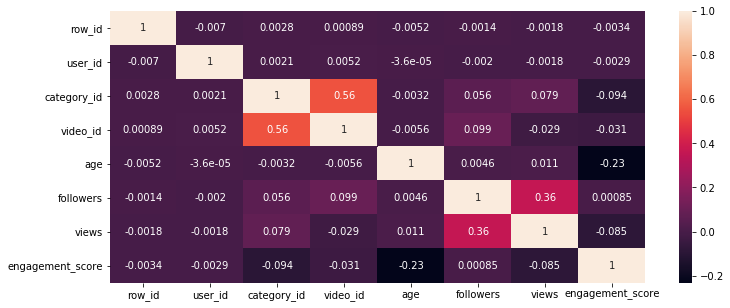

In [14]:
# Plotting the Heatmap, to check the correlation amongst the features.
plt.figure(figsize = (12,5))
sns.heatmap(df_train.corr(), annot = True)
plt.show()

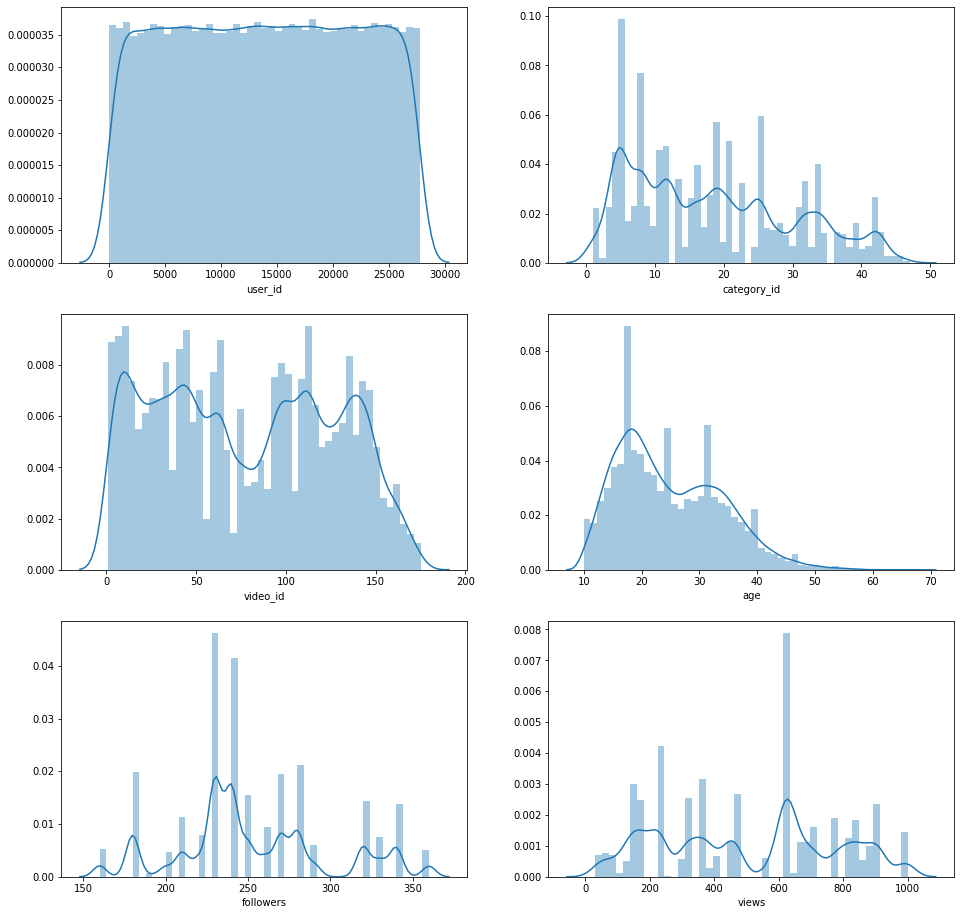

In [15]:
# Distribution Plot for columns.

plt.figure(figsize = (16,16))

plt.subplot(3,2,1)
sns.distplot(df_train['user_id'])

plt.subplot(3,2,2)
sns.distplot(df_train['category_id'])

plt.subplot(3,2,3)
sns.distplot(df_train['video_id'])

plt.subplot(3,2,4)
sns.distplot(df_train['age'])

plt.subplot(3,2,5)
sns.distplot(df_train['followers'])

plt.subplot(3,2,6)
sns.distplot(df_train['views'])

plt.show()

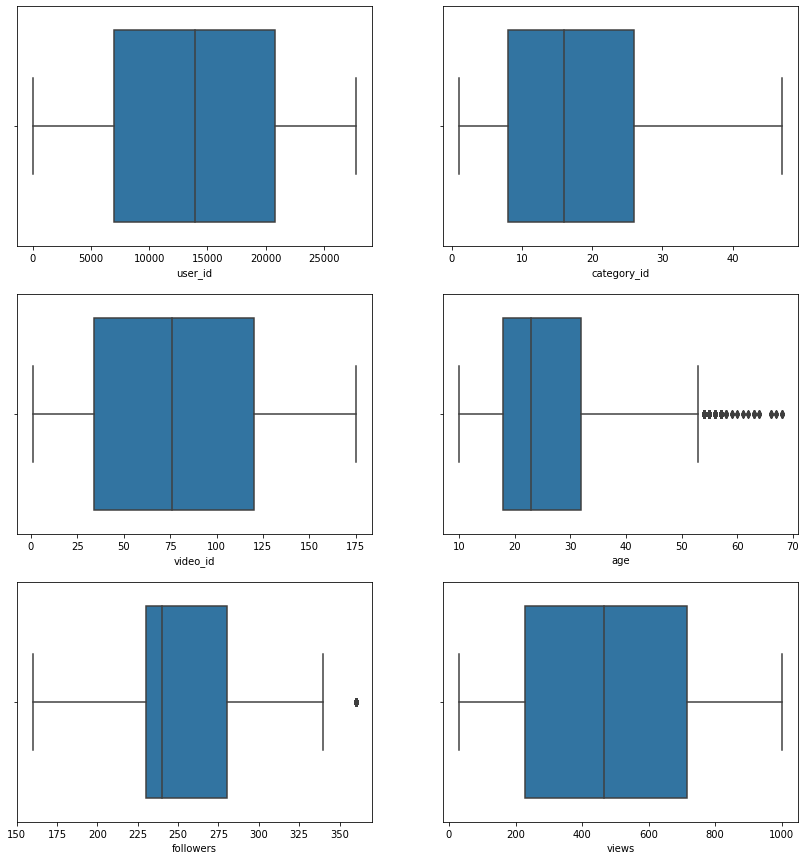

In [16]:
# Plotting the Boxplots again for columns to check for the outliers.

plt.figure(figsize = (14,15))

plt.subplot(3,2,1)
sns.boxplot(df_train['user_id'])

plt.subplot(3,2,2)
sns.boxplot(df_train['category_id'])

plt.subplot(3,2,3)
sns.boxplot(df_train['video_id'])

plt.subplot(3,2,4)
sns.boxplot(df_train['age'])

plt.subplot(3,2,5)
sns.boxplot(df_train['followers'])

plt.subplot(3,2,6)
sns.boxplot(df_train['views'])

plt.show()

In [17]:
# Capping outliers with respective percentiles
percentiles = df_train['age'].quantile([0.001,0.999]).values
df_train['age'][df_train['age'] >= percentiles[1]] = percentiles[1]
df_test['age'][df_test['age'] >= percentiles[1]] = percentiles[1]

percentiles = df_train['followers'].quantile([0.005,0.995]).values
df_train['followers'][df_train['followers'] >= percentiles[1]] = percentiles[1]
df_test['followers'][df_test['followers'] >= percentiles[1]] = percentiles[1]

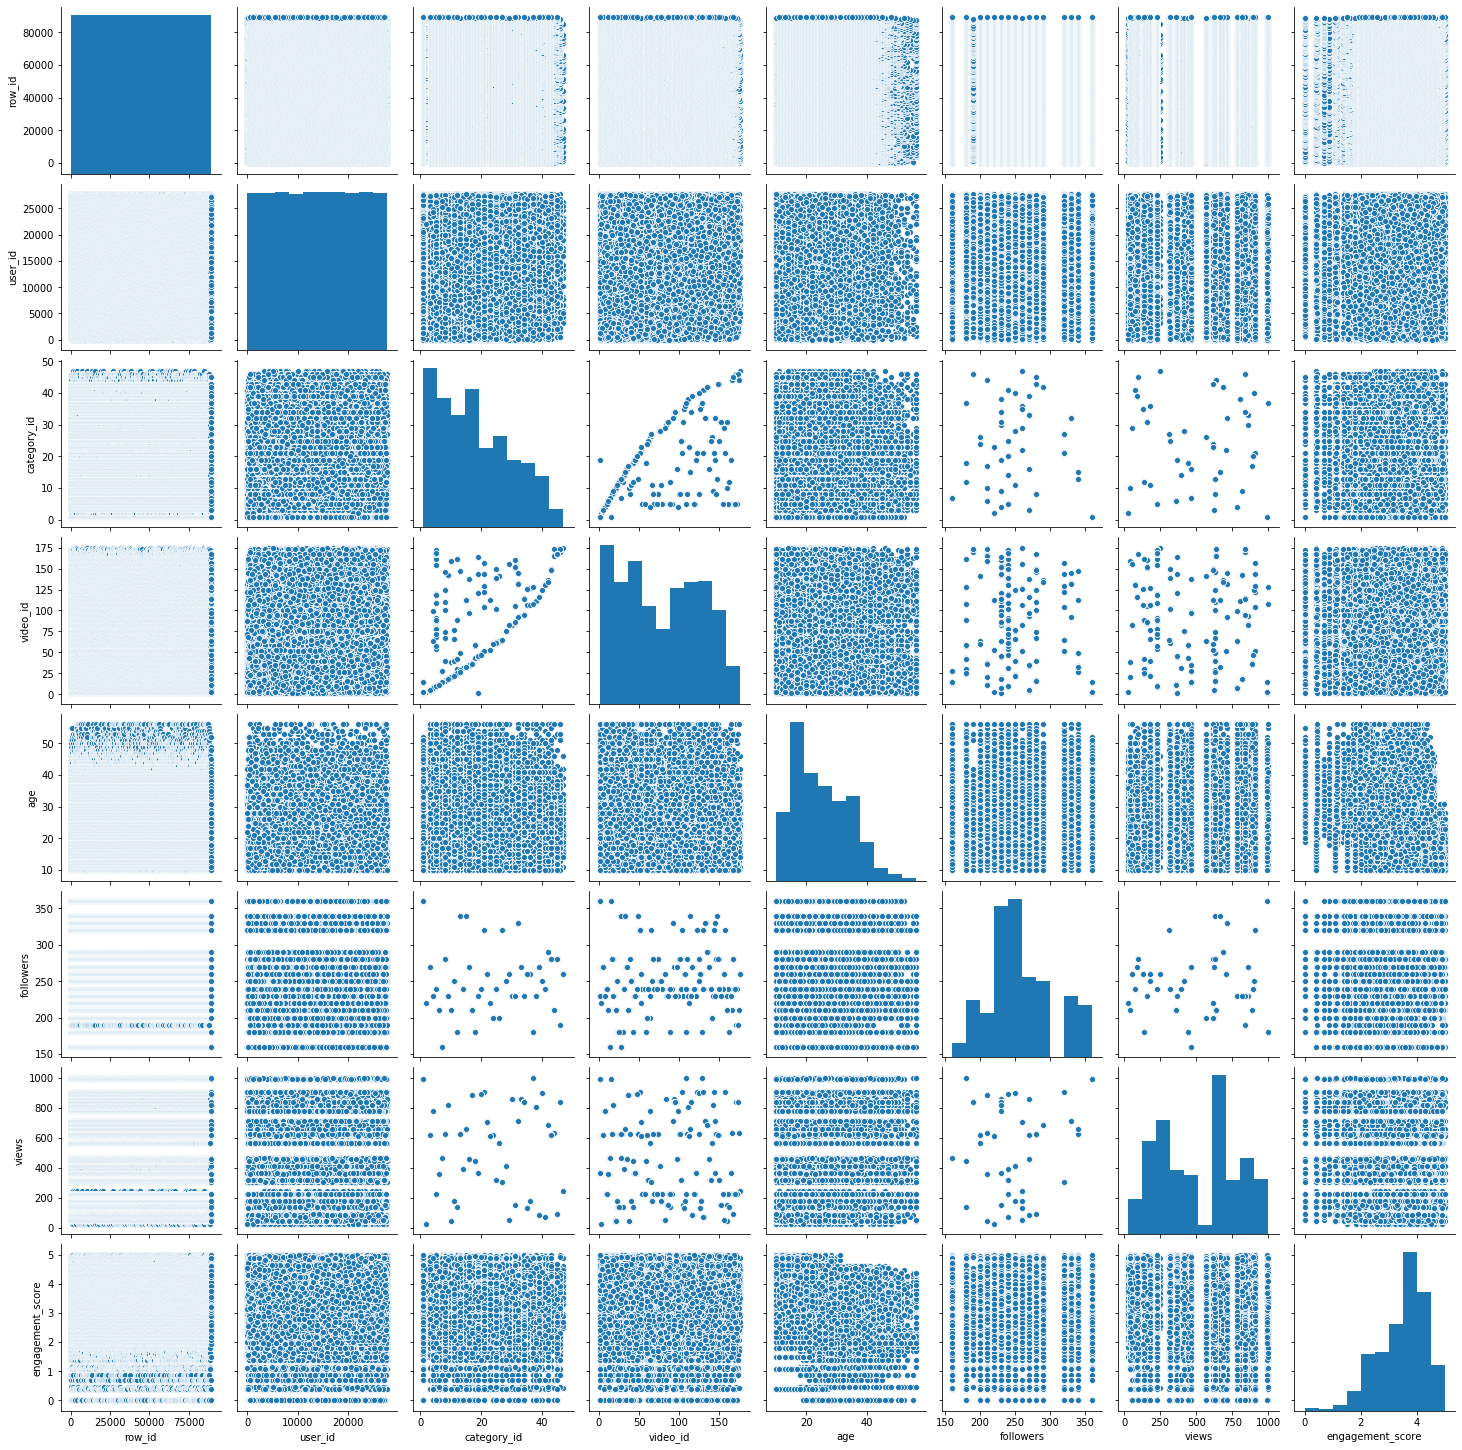

In [18]:
# Plotting the pairplot to check the relation in numerical features.
sns.pairplot(df_train)
plt.show()

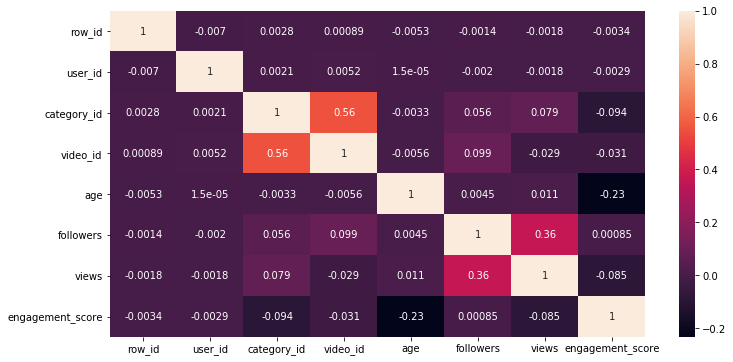

In [19]:
# Plotting the Heatmap again, to check the correlation amongst the features and to check for insignificant features.
plt.figure(figsize = (12,6))
sns.heatmap(df_train.corr(), annot = True)
plt.show()

In [20]:
# OneHotEncoding using get_dummies()


columns_for_getDummies = ['gender' ,'profession']

train_objs_num = len(df_train)
dataset = pd.concat(objs=[df_train, df_test], axis=0)
dataset = pd.get_dummies(dataset[columns_for_getDummies])
df_train = pd.concat(objs=[df_train, dataset[:train_objs_num]], axis=1)
df_test = pd.concat(objs=[df_test, dataset[train_objs_num:]], axis=1)
 
df_train= df_train.drop(columns_for_getDummies,1)
df_test= df_test.drop(columns_for_getDummies,1)

In [21]:
df_train.shape, df_test.shape

((89197, 13), (11121, 12))

In [22]:
# Dropping target variable to train the model
df_train = df_train.drop('row_id',1)
df_test = df_test.drop('row_id',1)
#seperating independent and dependent variables
X = df_train.drop('engagement_score',1)
# X = df_train
y = df_train[['engagement_score']]
X.shape, y.shape

((89197, 11), (89197, 1))

In [23]:
# Importing the train test split function and Then splitting the Train data in two different subsets of Train & Test.
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(X,y,test_size = 0.15, random_state = 56)

In [24]:
train_x.shape, test_x.shape

((75817, 11), (13380, 11))

In [25]:
train_y.shape, test_y.shape

((75817, 1), (13380, 1))

In [26]:
# Normalising the dataframe using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [27]:
# fit_transform() on Train data and transform() on Test data
train_x_scaled = pd.DataFrame(scaler.fit_transform(train_x), columns=train_x.columns, index = train_x.index)
test_x_scaled = pd.DataFrame(scaler.transform(test_x), columns=test_x.columns, index = test_x.index)
df_test_scaled = pd.DataFrame(scaler.transform(df_test), columns=df_test.columns, index = df_test.index)

In [28]:
train_x_scaled.head()

,user_id,category_id,video_id,age,followers,views,gender_Female,gender_Male,profession_Other,profession_Student,profession_Working Professional
79242,-0.160552,2.369711,1.924056,-0.429141,-1.356745,1.255209,1.19470,-1.19470,-0.656502,0.998142,-0.496692
9338,-0.299735,-0.199836,0.418710,0.800078,0.379812,-0.152482,1.19470,-1.19470,1.523224,-1.001861,-0.496692
6008,-0.416180,-1.142004,-1.416574,0.241342,-0.271396,-1.020186,-0.83703,0.83703,1.523224,-1.001861,-0.496692
83396,0.690416,0.228422,1.346663,0.129595,1.465161,1.512169,-0.83703,0.83703,1.523224,-1.001861,-0.496692
50022,0.184033,-1.142004,0.191877,-0.317394,-0.271396,-1.020186,-0.83703,0.83703,-0.656502,0.998142,-0.496692


In [29]:
# Importing other necessary libraries
from sklearn.preprocessing import StandardScaler,MinMaxScaler,PolynomialFeatures
from sklearn.model_selection import train_test_split,GridSearchCV,KFold,cross_val_score
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score

In [30]:
lr = LinearRegression()
lr.fit(train_x_scaled, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [31]:
print(lr.intercept_)
print(lr.coef_)

[3.48864832]
[[-7.03402887e-04 -8.59375643e-02  1.61281093e-02  1.11014544e-02
   2.44158948e-02 -6.06227257e-02  3.26288549e+10  3.26288549e+10
  -8.84786145e+11 -9.64294036e+11 -7.68359510e+11]]


In [32]:
y_pred_train = lr.predict(train_x_scaled)

In [33]:
y_pred_train

array([[3.03656092],
       [2.96160975],
       [3.75592127],
       ...,
       [3.94439784],
       [3.43780604],
       [2.97224355]])

In [34]:
y_pred_train = pd.DataFrame(y_pred_train)

In [35]:
y_pred_train.columns = train_y.columns
y_pred_train.index = train_y.index
y_pred_train

,engagement_score
79242,3.036561
9338,2.961610
6008,3.755921
83396,3.569581
50022,4.188233
...,...
78478,4.017640
42106,3.464967
25835,3.944398
3264,3.437806


In [36]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(train_y, y_pred_train)
r_squared = r2_score(train_y, y_pred_train)
print(mse)
print('Root Mean_Squared_Error :' ,np.sqrt(mse))
print('r_square_value :',r_squared)

0.5429053067824593
Root Mean_Squared_Error : 0.7368210819340468
r_square_value : 0.2729233191923196


In [37]:
y_pred = lr.predict(test_x_scaled)

In [38]:
y_pred

array([[4.19183436],
       [3.27954188],
       [4.19824305],
       ...,
       [4.05658045],
       [3.38195887],
       [3.65350428]])

In [39]:
y_pred = pd.DataFrame(y_pred)
y_pred.columns = test_y.columns
y_pred.index = test_y.index
y_pred

,engagement_score
21107,4.191834
30845,3.279542
10357,4.198243
50068,4.130372
20705,3.587098
...,...
53521,2.705201
16644,3.075135
83953,4.056580
77294,3.381959


In [40]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(test_y, y_pred)
r_squared = r2_score(test_y, y_pred)
print(mse)
print('Root Mean_Squared_Error :' ,np.sqrt(mse))
print('r_square_value :',r_squared)

0.5406532814317727
Root Mean_Squared_Error : 0.7352912901916986
r_square_value : 0.2688953157739551


In [41]:
# final_pred_2 = lr.predict(df_test_scaled)
# final_pred_2

In [42]:
# final_pred_2 = pd.DataFrame(final_pred_2)
# sub = pd.read_csv(r"C:\Users\pursw\Downloads\Job-e-thon\sample_submission_av.csv")
# df_merged = pd.concat([sub, final_pred_2], axis=1)
# df_merged.head()

In [43]:
# df_merged.rename(columns = {0 : 'engagement_Score'}, inplace = True)
# df_merged.drop('engagement_score',1,inplace = True)
# df_merged.rename(columns = {'engagement_Score' : 'engagement_score'}, inplace = True)
# df_merged.to_csv('sub_lr_final.csv',index=False)
# df_merged.head()

## Random Forest Regressor

In [44]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor

In [45]:
forest_reg = RandomForestRegressor(n_estimators=24, criterion='mse', max_depth=15,random_state=0) 

In [46]:
#xgb_reg = XGBRegressor(learning_rate=1.0, max_depth=6, min_child_weight=40, seed=0)
forest_reg.fit(train_x_scaled, train_y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=15, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=24, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [47]:
y_pred_train = forest_reg.predict(train_x_scaled)
y_pred_train = pd.DataFrame(y_pred_train)
y_pred_train.columns = train_y.columns
y_pred_train.index = train_y.index
y_pred_train

,engagement_score
79242,3.065756
9338,3.444161
6008,3.971009
83396,3.173956
50022,4.334222
...,...
78478,3.959203
42106,3.382422
25835,4.002651
3264,3.101714


In [48]:
se = mean_squared_error(train_y, y_pred_train)
r_squared = r2_score(train_y, y_pred_train)
print(mse)
print('Root Mean_Squared_Error :' ,np.sqrt(mse))
print('r_square_value :',r_squared)

0.5406532814317727
Root Mean_Squared_Error : 0.7352912901916986
r_square_value : 0.6027614454081998


In [49]:
y_pred = forest_reg.predict(test_x_scaled)
y_pred = pd.DataFrame(y_pred)

y_pred.columns = test_y.columns
y_pred.index = test_y.index
y_pred

,engagement_score
21107,4.281112
30845,3.741826
10357,4.227934
50068,4.150480
20705,3.920303
...,...
53521,3.344785
16644,3.151669
83953,4.264324
77294,3.419654


In [50]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(test_y, y_pred)
r_squared = r2_score(test_y, y_pred)
print(mse)
print('Root Mean_Squared_Error :' ,np.sqrt(mse))
print('r_square_value :',r_squared)

0.4692920608881336
Root Mean_Squared_Error : 0.6850489478045592
r_square_value : 0.36539435573793666


## Random Forest Regressor with Grid Search CV

In [51]:
rf = RandomForestRegressor(random_state = 100, n_jobs=-1)

params = {
    'max_depth' : [1,2,5,8,10,15,20],
    'min_samples_leaf' : [5,10,20,50,100],
    'n_estimators' : [1,10,30,50,100,200,250]
#     300
}

In [52]:
# from sklearn.model_selection import GridSearchCV

# gridsearchcv = GridSearchCV(estimator=rf, param_grid=params, scoring='r2')

# gridsearchcv.fit(train_x_scaled, train_y)

In [53]:
# gridsearchcv.best_estimator_.get_params 

In [55]:
rf2 = RandomForestRegressor(random_state=100 ,max_depth= 18, min_samples_leaf =6, n_estimators=250)
rf2.fit(train_x_scaled,train_y)
# y_pred=rf2.predict(test_x_scaled)[:,1]

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=18, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=6,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=250, n_jobs=None, oob_score=False,
                      random_state=100, verbose=0, warm_start=False)

In [56]:
y_pred_train = rf2.predict(train_x_scaled)
y_pred_train = pd.DataFrame(y_pred_train)
y_pred_train.columns = train_y.columns
y_pred_train.index = train_y.index
y_pred_train

,engagement_score
79242,3.090917
9338,3.437179
6008,3.959188
83396,3.223793
50022,4.446523
...,...
78478,3.908832
42106,3.325526
25835,3.921446
3264,3.141113


In [57]:
se = mean_squared_error(train_y, y_pred_train)
r_squared = r2_score(train_y, y_pred_train)
print(mse)
print('Root Mean_Squared_Error :' ,np.sqrt(mse))
print('r_square_value :',r_squared)

0.4692920608881336
Root Mean_Squared_Error : 0.6850489478045592
r_square_value : 0.5590765679186529


In [58]:
y_pred = rf2.predict(test_x_scaled)
y_pred = pd.DataFrame(y_pred)

y_pred.columns = test_y.columns
y_pred.index = test_y.index
y_pred

,engagement_score
21107,4.278589
30845,4.125658
10357,4.125968
50068,4.130796
20705,3.983310
...,...
53521,3.394579
16644,3.145732
83953,4.305994
77294,3.382251


In [59]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(test_y, y_pred)
r_squared = r2_score(test_y, y_pred)
print(mse)
print('Root Mean_Squared_Error :' ,np.sqrt(mse))
print('r_square_value :',r_squared)

0.4695539970143863
Root Mean_Squared_Error : 0.6852401017266768
r_square_value : 0.36504014956653563


In [60]:
final_pred_2 = rf2.predict(df_test_scaled)
final_pred_2

array([4.10872179, 3.37994659, 2.75646286, ..., 3.57468624, 3.86311043,
       3.15386417])

In [61]:
final_pred_2 = pd.DataFrame(final_pred_2)
sub = pd.read_csv(r"C:\Users\pursw\Downloads\Job-e-thon\sample_submission_av.csv")
df_merged = pd.concat([sub, final_pred_2], axis=1)
df_merged.head()

,row_id,engagement_score,0
0,89198,5.0,4.108722
1,89199,5.0,3.379947
2,89200,5.0,2.756463
3,89201,5.0,3.862286
4,89202,5.0,2.393168


In [62]:
df_merged.rename(columns = {0 : 'engagement_Score'}, inplace = True)
df_merged.drop('engagement_score',1,inplace = True)
df_merged.rename(columns = {'engagement_Score' : 'engagement_score'}, inplace = True)
df_merged.to_csv('sub_rfgvO_final.csv',index=False)
df_merged.head()

,row_id,engagement_score
0,89198,4.108722
1,89199,3.379947
2,89200,2.756463
3,89201,3.862286
4,89202,2.393168


## Ada-Boost Regressor

In [125]:
ada_reg = AdaBoostRegressor(n_estimators=25, learning_rate=0.5, loss='square',random_state=0)

In [126]:
ada_reg.fit(train_x_scaled, train_y)

AdaBoostRegressor(base_estimator=None, learning_rate=0.5, loss='square',
                  n_estimators=25, random_state=0)

In [127]:
y_pred_train = ada_reg.predict(train_x_scaled)
y_pred_train = pd.DataFrame(y_pred_train)
y_pred_train.columns = train_y.columns
y_pred_train.index = train_y.index
y_pred_train

,engagement_score
79242,2.816141
9338,2.433371
6008,2.537501
83396,2.433371
50022,3.358166
...,...
78478,2.816167
42106,2.540167
25835,2.958855
3264,2.816141


In [128]:
se = mean_squared_error(train_y, y_pred_train)
r_squared = r2_score(train_y, y_pred_train)
print(mse)
print('Root Mean_Squared_Error :' ,np.sqrt(mse))
print('r_square_value :',r_squared)

0.4692920608881336
Root Mean_Squared_Error : 0.6850489478045592
r_square_value : -0.5893004677400389


In [129]:
y_pred = ada_reg.predict(test_x_scaled)
y_pred = pd.DataFrame(y_pred)

y_pred.columns = test_y.columns
y_pred.index = test_y.index
y_pred

,engagement_score
21107,3.358166
30845,2.916754
10357,3.456464
50068,3.358166
20705,3.068632
...,...
53521,2.466213
16644,2.537501
83953,3.456464
77294,3.075035


In [130]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(test_y, y_pred)
r_squared = r2_score(test_y, y_pred)
print(mse)
print('Root Mean_Squared_Error :' ,np.sqrt(mse))
print('r_square_value :',r_squared)

1.1797520192765871
Root Mean_Squared_Error : 1.086163900742695
r_square_value : -0.5953333811904244


## Gradient Boosting Regressor

In [131]:
gradient_reg = GradientBoostingRegressor(n_estimators=80, criterion='friedman_mse',max_depth=8,learning_rate=0.09, random_state=0)

In [132]:
gradient_reg.fit(train_x_scaled, train_y)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.09, loss='ls', max_depth=8,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=80,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=0, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [133]:
y_pred_train = gradient_reg.predict(train_x_scaled)
y_pred_train = pd.DataFrame(y_pred_train)
y_pred_train.columns = train_y.columns
y_pred_train.index = train_y.index
y_pred_train

,engagement_score
79242,2.951987
9338,3.459218
6008,3.948068
83396,3.578008
50022,4.215428
...,...
78478,3.958024
42106,3.487276
25835,4.014480
3264,3.121575


In [134]:
se = mean_squared_error(train_y, y_pred_train)
r_squared = r2_score(train_y, y_pred_train)
print(mse)
print('Root Mean_Squared_Error :' ,np.sqrt(mse))
print('r_square_value :',r_squared)

1.1797520192765871
Root Mean_Squared_Error : 1.086163900742695
r_square_value : 0.44880738044930213


In [135]:
y_pred = gradient_reg.predict(test_x_scaled)
y_pred = pd.DataFrame(y_pred)

y_pred.columns = test_y.columns
y_pred.index = test_y.index
y_pred

,engagement_score
21107,4.293373
30845,4.017834
10357,4.159230
50068,4.132894
20705,4.067219
...,...
53521,3.195592
16644,3.081105
83953,4.069372
77294,3.470863


In [136]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(test_y, y_pred)
r_squared = r2_score(test_y, y_pred)
print(mse)
print('Root Mean_Squared_Error :' ,np.sqrt(mse))
print('r_square_value :',r_squared)

0.47113383200173903
Root Mean_Squared_Error : 0.6863918938927958
r_square_value : 0.36290379934130623


## Extreme Gradient Boosting

In [185]:
from xgboost.sklearn import XGBRegressor

In [186]:
xgb_reg = XGBRegressor(learning_rate=0.5, min_child_weight=40, seed=0)

In [187]:
xgb_reg.fit(train_x_scaled, train_y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.5, max_delta_step=0, max_depth=6,
             min_child_weight=40, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, seed=0, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [188]:
y_pred_train = xgb_reg.predict(train_x_scaled)
y_pred_train = pd.DataFrame(y_pred_train)
y_pred_train.columns = train_y.columns
y_pred_train.index = train_y.index
y_pred_train

,engagement_score
79242,2.914555
9338,3.583170
6008,3.964879
83396,3.748616
50022,4.404533
...,...
78478,3.996747
42106,3.451853
25835,3.971175
3264,3.281050


In [189]:
se = mean_squared_error(train_y, y_pred_train)
r_squared = r2_score(train_y, y_pred_train)
print(mse)
print('Root Mean_Squared_Error :' ,np.sqrt(mse))
print('r_square_value :',r_squared)

0.4724783261720027
Root Mean_Squared_Error : 0.6873705886725171
r_square_value : 0.4433648863488613


In [190]:
y_pred = xgb_reg.predict(test_x_scaled)
y_pred = pd.DataFrame(y_pred)

y_pred.columns = test_y.columns
y_pred.index = test_y.index
y_pred

,engagement_score
21107,4.342359
30845,3.975995
10357,4.262957
50068,4.205824
20705,3.831701
...,...
53521,3.127637
16644,3.055237
83953,4.303661
77294,3.491130


In [191]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(test_y, y_pred)
r_squared = r2_score(test_y, y_pred)
print(mse)
print('Root Mean_Squared_Error :' ,np.sqrt(mse))
print('r_square_value :',r_squared)

0.4761241756506961
Root Mean_Squared_Error : 0.6900175183650746
r_square_value : 0.3561555491355769


## Extreme Gradient Boosting with Grid Search CV

In [206]:
params = {
    'learning_rate' : [0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.5],
    'max_depth' : [5, 8, 10, 15, 20, 25],
    'min_child_weight' : [11, 15, 17, 19, 21],
    'n_estimators' : [10,30,50,100,200,250]
}

In [207]:
# xgboost1 = xgb.XGBRegressor(random_state=100)

# from sklearn.model_selection import GridSearchCV

# gridsearchcv = GridSearchCV(estimator=xgboost1, param_grid=params, scoring='r2' , cv=3, n_jobs=-1)
# gridsearchcv.fit(train_x_scaled,train_y)

In [194]:
# # Getting the best parameters
# gridsearchcv.best_estimator_.get_params

In [208]:
# Fitting the model and predicting the probabilities. 
xgboost1 = XGBRegressor(random_state = 100, learning_rate=0.05, max_depth=5, 
                             min_child_weight=19, n_estimators=150)

xgboost1.fit(train_x_scaled,train_y)
# y_pred=xgboost1.predict_proba(test_x_scaled)[:,1]

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=5,
             min_child_weight=19, missing=nan, monotone_constraints='()',
             n_estimators=150, n_jobs=8, num_parallel_tree=1,
             objective='reg:squarederror', random_state=100, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [209]:
y_pred_train = xgboost1.predict(train_x_scaled)
y_pred_train = pd.DataFrame(y_pred_train)
y_pred_train.columns = train_y.columns
y_pred_train.index = train_y.index
y_pred_train

,engagement_score
79242,2.893086
9338,3.315813
6008,3.853573
83396,3.666457
50022,4.219248
...,...
78478,3.980467
42106,3.504309
25835,3.986230
3264,3.293775


In [210]:
se = mean_squared_error(train_y, y_pred_train)
r_squared = r2_score(train_y, y_pred_train)
print(mse)
print('Root Mean_Squared_Error :' ,np.sqrt(mse))
print('r_square_value :',r_squared)

0.48537776422300055
Root Mean_Squared_Error : 0.6966905799729178
r_square_value : 0.3683561584213334


In [211]:
y_pred = xgboost1.predict(test_x_scaled)
y_pred = pd.DataFrame(y_pred)

y_pred.columns = test_y.columns
y_pred.index = test_y.index
y_pred

,engagement_score
21107,4.360244
30845,3.942078
10357,4.199573
50068,4.065012
20705,3.878399
...,...
53521,3.115703
16644,3.110406
83953,3.983092
77294,3.446299


In [212]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(test_y, y_pred)
r_squared = r2_score(test_y, y_pred)
print(mse)
print('Root Mean_Squared_Error :' ,np.sqrt(mse))
print('r_square_value :',r_squared)

0.48149147164799955
Root Mean_Squared_Error : 0.6938958651325137
r_square_value : 0.3488975607352023


In [213]:
# final_pred_2 = xgboost1.predict(df_test_scaled)
# final_pred_2

array([4.093772 , 3.6908634, 2.7150898, ..., 3.928286 , 3.8600297,
       3.4000058], dtype=float32)

In [214]:
# final_pred_df_2 = pd.DataFrame(final_pred_2)
# sub = pd.read_csv(r"C:\Users\pursw\Downloads\Job-e-thon\sample_submission_av.csv")
# df_merged = pd.concat([sub, final_pred_df_2], axis=1)
# df_merged.head()

,row_id,engagement_score,0
0,89198,5.0,4.093772
1,89199,5.0,3.690863
2,89200,5.0,2.715090
3,89201,5.0,3.890606
4,89202,5.0,2.374650


In [215]:
# df_merged.rename(columns = {0 : 'engagement_Score'}, inplace = True)
# df_merged.drop('engagement_score',1,inplace = True)
# df_merged.rename(columns = {'engagement_Score' : 'engagement_score'}, inplace = True)
# df_merged.to_csv('sub_cgbgv_final_2.csv',index=False)
# df_merged.head()

,row_id,engagement_score
0,89198,4.093772
1,89199,3.690863
2,89200,2.715090
3,89201,3.890606
4,89202,2.374650


### Submitting final model with `Random Forest` with `Grid Search CV`.